# Exploratory Data Analysis: Adrian

Purpose: Initial exploration of stock return behaviour around earnings events.

In [1]:
import pandas as pd

## 1. Load data

In [2]:
# Load the dataset
df = pd.read_csv("event_study_price_data.csv")

# Quick check
df.head()

,ticker,date,open,high,low,close,volume,earnings_date,td_num,event_day,daily_return,daily_return_pct
0,AAPL,2020-01-02,74.06,75.15,73.80,75.09,33911864,NaN,0,NaN,NaN,NaN
1,AAPL,2020-01-03,74.29,75.15,74.13,74.36,36633878,NaN,1,NaN,-0.009722,-0.972167
2,AAPL,2020-01-06,73.45,74.99,73.19,74.95,29644644,NaN,2,NaN,0.007934,0.793437
3,AAPL,2020-01-07,74.96,75.22,74.37,74.60,27877655,NaN,3,NaN,-0.004670,-0.466978
4,AAPL,2020-01-08,74.29,76.11,74.29,75.80,33090946,NaN,4,NaN,0.016086,1.608579


In [4]:
df.shape

(4524, 12)

In [6]:
df.dtypes

ticker               object
date                 object
open                float64
high                float64
low                 float64
close               float64
volume                int64
earnings_date        object
td_num                int64
event_day           float64
daily_return        float64
daily_return_pct    float64
dtype: object

In [7]:
# Convert date columns to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["earnings_date"] = pd.to_datetime(df["earnings_date"], errors="coerce")

In [8]:
df.dtypes

ticker                      object
date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
earnings_date       datetime64[ns]
td_num                       int64
event_day                  float64
daily_return               float64
daily_return_pct           float64
dtype: object

## 2. Calculate average daily returns by event day
Note: All three firms release earnings results at 1600 after the NASDAQ closes, meaning that market reaction is from event day +1.

In [11]:
# keep only event-window rows
df_win = df[df["event_day"].between(-5, 5)].copy()

# now event_day can safely be int
df_win["event_day"] = df_win["event_day"].astype(int)

summary = (
    df_win
    .groupby(["ticker", "event_day"])["daily_return"]
    .agg(mean="mean", median="median", n="count")
    .reset_index()
    .sort_values(["ticker", "event_day"])
)

summary.head(33)

,ticker,event_day,mean,median,n
0,AAPL,-5,0.001009,-0.001260,24
1,AAPL,-4,0.002761,0.001361,24
2,AAPL,-3,0.006973,0.004447,24
3,AAPL,-2,-0.000667,0.000932,24
4,AAPL,-1,-0.001268,-0.001015,24
5,AAPL,0,0.006118,0.003715,24
6,AAPL,1,0.005092,-0.005293,24
7,AAPL,2,-0.006157,-0.004460,24
8,AAPL,3,0.002782,0.005899,24
9,AAPL,4,0.004971,0.002710,24


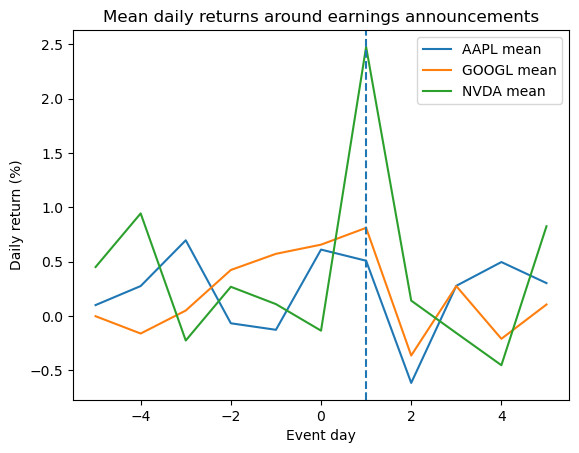

In [21]:
# Visualise mean daily returns by event day
import matplotlib.pyplot as plt

for t, g in summary.groupby("ticker"):
    g = g.sort_values("event_day")
    plt.plot(g["event_day"], g["mean"]*100, label=f"{t} mean")

plt.axvline(1, linestyle="--")
plt.xlabel("Event day")
plt.ylabel("Daily return (%)")
plt.title("Mean daily returns around earnings announcements")
plt.legend()
plt.show()

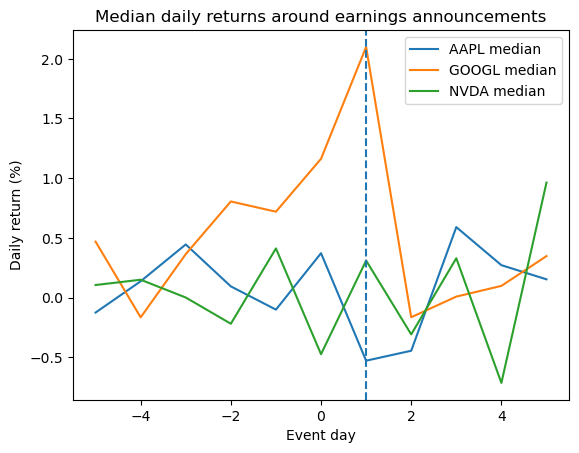

In [22]:
# Visualise median daily returns by event day
for t, g in summary.groupby("ticker"):
    g = g.sort_values("event_day")
    plt.plot(g["event_day"], g["median"]*100, label=f"{t} median")

plt.axvline(1, linestyle="--")
plt.xlabel("Event day")
plt.ylabel("Daily return (%)")
plt.title("Median daily returns around earnings announcements")
plt.legend()
plt.show()

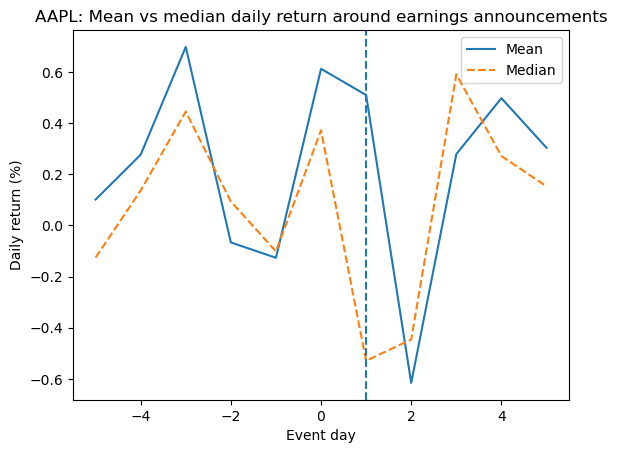

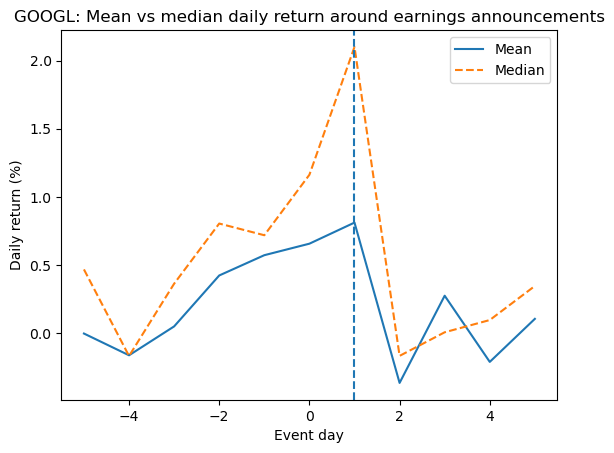

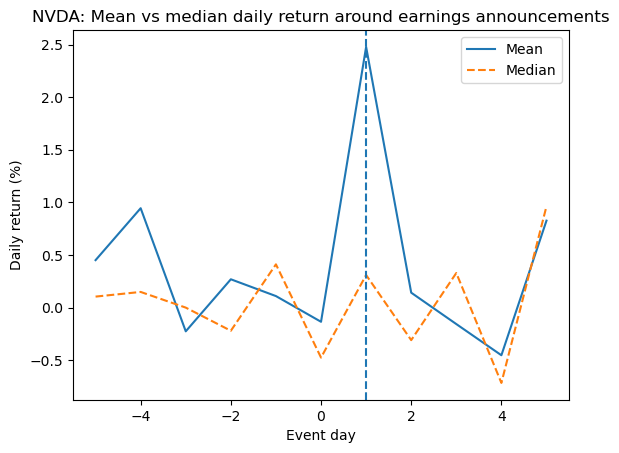

In [20]:
# Visualise mean and median daily returns separately for each firm

# 1) filter to the event window
df_win = df[df["event_day"].between(-5, 5)].copy()
df_win["event_day"] = df_win["event_day"].astype(int)

# 2) compute mean/median
summary = (
    df_win
    .groupby(["ticker", "event_day"])["daily_return"]
    .agg(mean="mean", median="median", n="count")
    .reset_index()
    .sort_values(["ticker", "event_day"])
)

# 3) one chart per ticker
for t, g in summary.groupby("ticker"):
    g = g.sort_values("event_day")

    plt.figure()
    plt.plot(g["event_day"], g["mean"]*100, label="Mean")
    plt.plot(g["event_day"], g["median"]*100, linestyle="--", label="Median")

    plt.axvline(1, linestyle="--")  # reaction day for after-close earnings
    plt.xlabel("Event day")
    plt.ylabel("Daily return (%)")
    plt.title(f"{t}: Mean vs median daily return around earnings announcements")
    plt.legend()
    plt.show()